In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class NRSystem:
    def __init__(self, X0, tolerance):
        self.X0 = np.array(X0, dtype=float)
        self.tolerance = tolerance

    # f1: circle
    def f1(self, a, b):
        return a**2 + b**2 - 4

    # f2: upward parabola shifted by 1
    def f2(self, a, b):
        return b - a**2 + 1

    # Derivatives of f1
    def f1_dx(self, a, b):
        return 2*a

    def f1_dy(self, a, b):
        return 2*b

    # Derivatives of new f2
    def f2_dx(self, a, b):
        return -2*a

    def f2_dy(self, a, b):
        return 1

    def jacobian(self, a, b):
        return np.array([
            [self.f1_dx(a, b), self.f1_dy(a, b)],
            [self.f2_dx(a, b), self.f2_dy(a, b)]
        ])

    def F(self, a, b):
        return np.array([self.f1(a, b), self.f2(a, b)])

    def update(self, a, b):
        J = self.jacobian(a, b)
        F_val = self.F(a, b)
        delta = np.linalg.solve(J, -F_val)
        return delta

    def evaluate(self):
        while True:
            delta = self.update(self.X0[0], self.X0[1])
            self.X0 += delta
            if np.linalg.norm(delta, ord=2) < self.tolerance:
                break
        return self.X0

    def plot(self):
        a_vals = np.linspace(-3, 3, 400)
        b_vals = np.linspace(-3, 3, 400)
        A, B = np.meshgrid(a_vals, b_vals)

        f1 = A**2 + B**2 - 4
        f2 = B - A**2 + 1

        plt.figure(figsize=(8, 6))
        contour1 = plt.contour(A, B, f1, levels=[0], colors='blue')
        contour2 = plt.contour(A, B, f2, levels=[0], colors='red')

        plt.clabel(contour1, inline=1, fontsize=10)
        plt.clabel(contour2, inline=1, fontsize=10)

        plt.title("Contour Plot of f1 (blue, circle) and f2 (red, parabola)")
        plt.xlabel("a")
        plt.ylabel("b")
        plt.grid(True)
        plt.legend(['f1=0', 'f2=0'])
        plt.show()


In [8]:
nr=NRSystem([1,2],0.00001)

In [9]:
print(nr.evaluate())

[1.51748991 1.30277564]


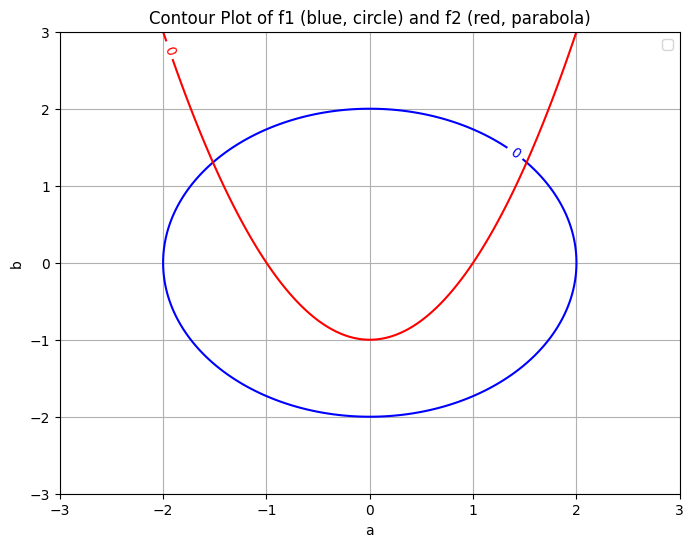

In [10]:
nr.plot()